### Morphological reconstruction
1. Erosion
2. Dilation

#### Usage
    1. Extract marked objects
    2. Find bright regions surrounded by dark regions
    3. Remove objects
    4. Fill holes

#### Use erosion and dilation to find holes and peaks

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io,data

from skimage.exposure import rescale_intensity # to get a high contrast image
from skimage.morphology import reconstruction 

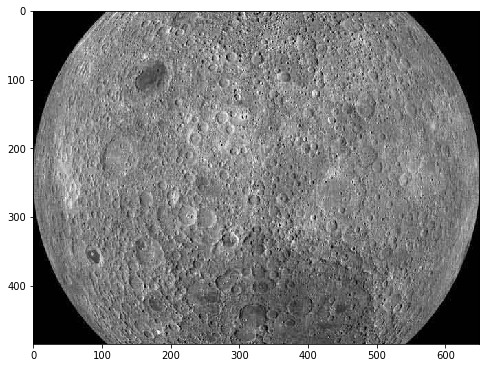

In [44]:
moon = io.imread("./images/moon.jpg")

plt.figure(figsize=(8,8))
plt.imshow(moon,cmap="gray")

### Make the image high-contrast

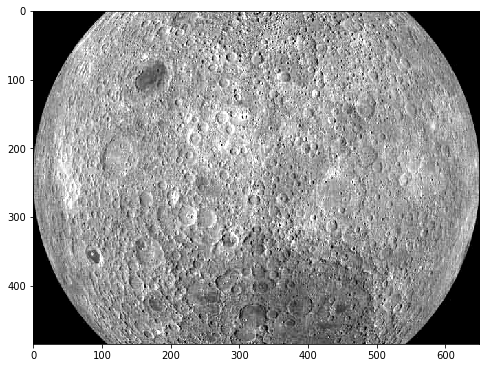

In [45]:
moon_rescaled = rescale_intensity(moon, in_range=(10,200))

plt.figure(figsize=(8,8))
plt.imshow(moon_rescaled, cmap="gray")

### Use erosion to shrink holes in the image

In [46]:
erosion_seed = np.copy(moon_rescaled)
erosion_seed[1:-1,1:-1] = moon_rescaled.max() # the seed image used for erosion is initialised to the max value of the original image, except for the pixels at the borders
mask = moon_rescaled

In [47]:
filled = reconstruction(erosion_seed, mask,method="erosion") # eroding inwards from the border to fill holes

/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `a

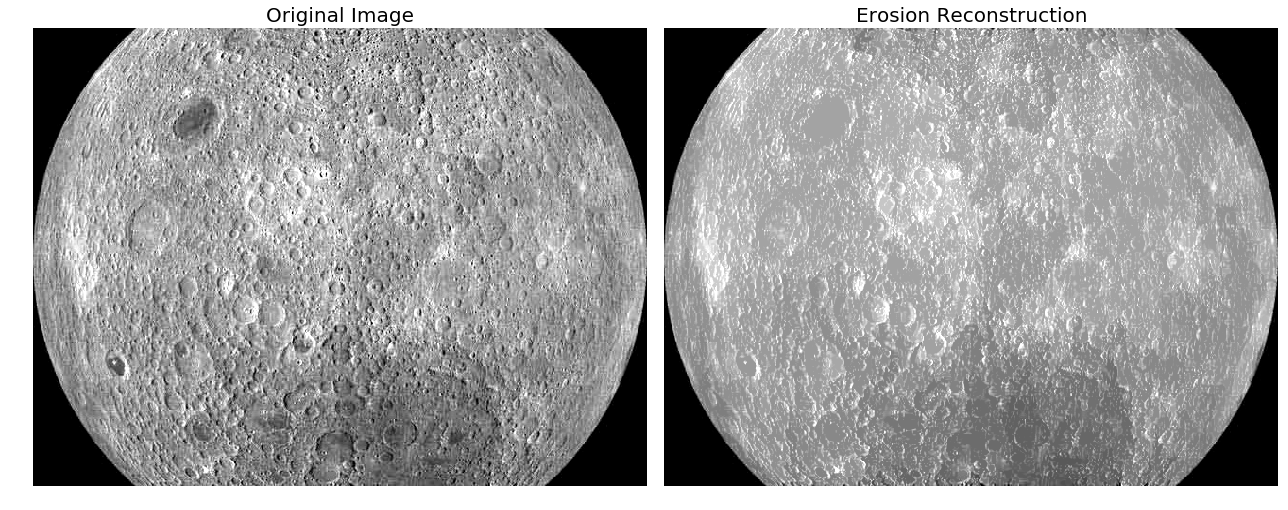

In [48]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)
ax = ax.ravel()

ax[0].imshow(moon_rescaled,cmap="gray")
ax[0].axis("off")
ax[0].set_title("Original Image",fontsize=20)

ax[1].imshow(filled,cmap="gray")
ax[1].axis("off")
ax[1].set_title("Erosion Reconstruction",fontsize=20)


fig.tight_layout()
plt.show()


### Dilation

In [49]:
dilation_seed = np.copy(moon_rescaled)

dilation_seed[1:-1,1:-1] = moon_rescaled.min() # the seed image used for erosion is initialised to the min value of the original image, except for the pixels at the borders

mask = moon_rescaled

In [50]:
highlighted = reconstruction(dilation_seed, mask,method="dilation") # highlight bright spots in an image by expanding high intensity values 

/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/anaconda3/lib/python3.7/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `a

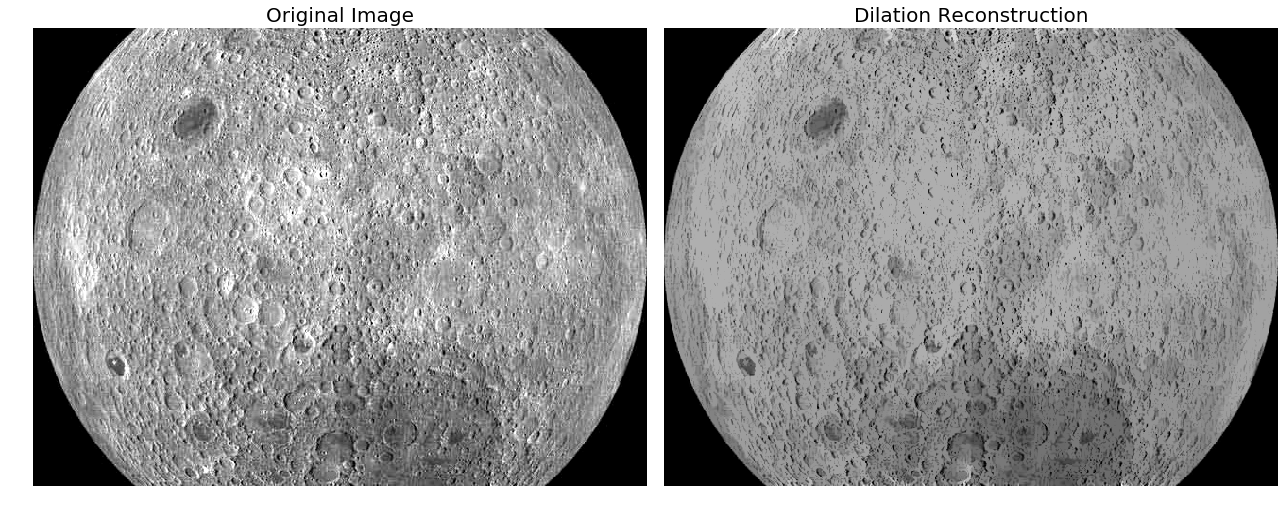

In [51]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)
ax = ax.ravel()

ax[0].imshow(moon_rescaled,cmap="gray")
ax[0].axis("off")
ax[0].set_title("Original Image",fontsize=20)

ax[1].imshow(highlighted,cmap="gray")
ax[1].axis("off")
ax[1].set_title("Dilation Reconstruction",fontsize=20)


fig.tight_layout()
plt.show()



In [52]:
holes = filled - moon_rescaled

peaks = highlighted - moon_rescaled

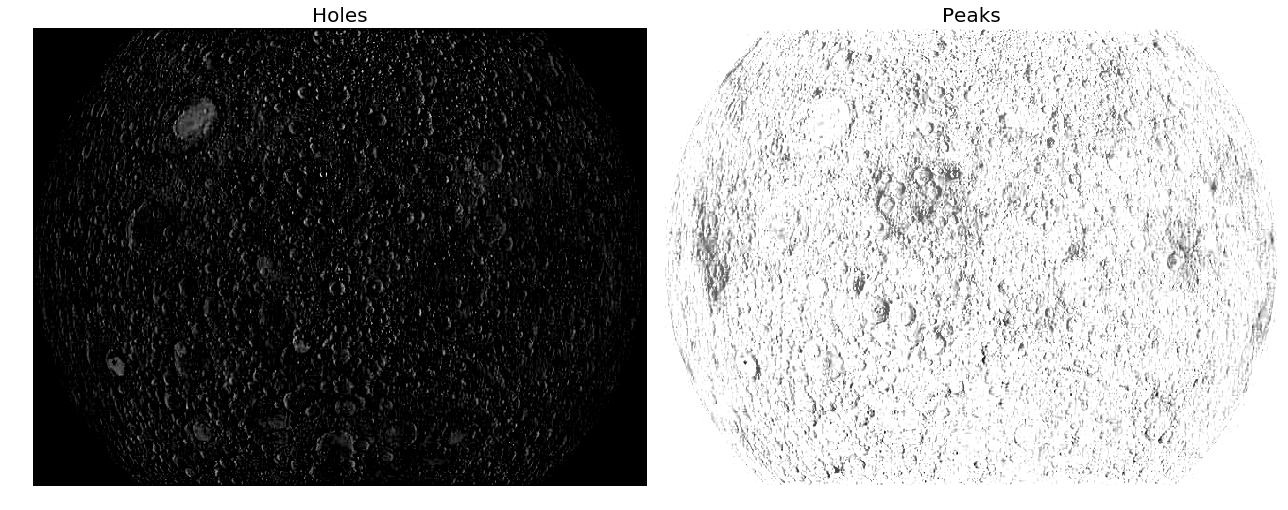

In [53]:
fig, ax = plt.subplots(1,2,
                      figsize=(18,14),
                      sharex=True,sharey=True)
ax = ax.ravel()

ax[0].imshow(holes,cmap="gray")
ax[0].axis("off")
ax[0].set_title("Holes",fontsize=20)

ax[1].imshow(peaks,cmap="gray")
ax[1].axis("off")
ax[1].set_title("Peaks",fontsize=20)


fig.tight_layout()
plt.show()

